# Micro-Credit Defaulter Model

### Import Libraries

In [1]:
# Data processing packages
import pandas as pd
import numpy as np
import scipy.stats as stats

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
df=pd.read_csv('C:/Users/Dazzle/Desktop/Internship/Assignment_07_Project/Micro Credit Project/Data file.csv')
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


Dataset is having numeric and categorical columns. 

### Project Description

The dataset is focused on microfinance institutions (MFI) providing their services and products to low income families and poor customers that can help them in the need of hour to provide micro-credit (insurance of loan) on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. 

The target variable in the data set is 'Label' that will be represented by binary classes. Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter. Hence it is a Binary classification problem.

Points to Remember:
•	There are no null values in the dataset. 
•	There may be some customers with no loan history. 
•	The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.
•	For some features, there may be values which might not be realistic. We may have to observe them and treat them with a suitable explanation.
•	You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.  

In [3]:
#Checking the dataset shape
df.shape

(209593, 37)

Dataset is having 209593 rows and 37 columns (36 input features and 1 output feature).

In [4]:
# Checking columns
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

Columns names are displayed where 'label' is the target variable and all other are independent variables.

In [5]:
# Checking datatypes
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

Here, we can see columns are of type object and integer i.e. both categorical and numeric columns are there.

In [6]:
# Checking dataset schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

It gives additional information regarding the dataset like RangeIndex, Data columns, datatypes. We could not see null values in the data summary. 'pdate' is date field but it is of object type, hence need to treat this column.

### Feature Engineering

In [7]:
# Feature engineering on 'pdate' column
df['pdate']=pd.to_datetime(df['pdate'])
df.dtypes.tail()

medianamnt_loans90           float64
payback30                    float64
payback90                    float64
pcircle                       object
pdate                 datetime64[ns]
dtype: object

Converted the datatype of 'pdate' column from object to relevant one.

In [8]:
# Creating new columns from 'pdate' column
df['pdate_day']=df['pdate'].dt.day
df['pdate_month']=df['pdate'].dt.month
df['pdate_year']=df['pdate'].dt.year

# Dropping the 'pdate' column
df.drop('pdate',axis=1,inplace=True)

# Checking the dataset values
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate_day,pdate_month,pdate_year
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,2.0,12,6,0.0,29.000000,29.000000,UPW,20,7,2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,1.0,12,12,0.0,0.000000,0.000000,UPW,10,8,2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,1.0,6,6,0.0,0.000000,0.000000,UPW,19,8,2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,2.0,12,6,0.0,0.000000,0.000000,UPW,6,6,2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,7.0,42,6,0.0,2.333333,2.333333,UPW,22,6,2016


### Data Preprocessing

In [9]:
# Checking which all column values are relevant for model training
for i in df.columns :
    print(i,' ',df[i].dtypes)
    print('Unique values : ',df[i].nunique())
    print('Value counts  : ',df[i].value_counts())
    print('----------------------')

Unnamed: 0   int64
Unique values :  209593
Value counts  :  2049      1
23969     1
126359    1
103832    1
105881    1
         ..
57929     1
64074     1
62027     1
51788     1
2047      1
Name: Unnamed: 0, Length: 209593, dtype: int64
----------------------
label   int64
Unique values :  2
Value counts  :  1    183431
0     26162
Name: label, dtype: int64
----------------------
msisdn   object
Unique values :  186243
Value counts  :  04581I85330    7
47819I90840    7
87592I84456    6
67324I84453    6
94119I84456    6
              ..
92373I95203    1
43123I90844    1
69639I90849    1
97045I89236    1
08598I88680    1
Name: msisdn, Length: 186243, dtype: int64
----------------------
aon   float64
Unique values :  4507
Value counts  :  95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
818222.402828      1
603666.669107      1
852238.900959      1
851325.512514      1
913930.093986      1
Name: aon, Length: 45

Value counts  :  0.000000     95699
2.000000      4982
3.000000      4437
4.000000      3610
2.500000      3015
             ...  
3.640000         1
3.043478         1
28.777778        1
47.750000        1
2.480000         1
Name: payback90, Length: 2381, dtype: int64
----------------------
pcircle   object
Unique values :  1
Value counts  :  UPW    209593
Name: pcircle, dtype: int64
----------------------
pdate_day   int64
Unique values :  31
Value counts  :  11    8092
10    8050
6     8030
12    8028
7     8026
5     7989
13    7969
8     7899
2     7839
1     7824
15    7820
14    7816
9     7717
17    7643
3     7607
16    7556
18    7305
4     7154
19    6857
20    6729
21    5964
23    5816
22    5753
27    5283
25    5269
26    5174
30    5129
24    5103
29    5077
28    4897
31    2178
Name: pdate_day, dtype: int64
----------------------
pdate_month   int64
Unique values :  3
Value counts  :  7    85765
6    83154
8    40674
Name: pdate_month, dtype: int64
-------------------

Column 'Unnamed: 0' has 209593 unique values that is equal to total rows. It is just a unique identifier. 'msisdn' (mobile number of user) dis of object type and does not seem to have valid values. It does not seem to contribute much for the prediction. 'pcircle' (telecom circle) has just 1 unique value (UPW) of object type.
'pdate_year' has just 1 unique value 2016, hence we can drop all these mentioned columns as there is no significant contribution of these columns to the model predicton.

Target column 'label' has 2 values but value counts have a huge difference hence there is class imbalance issue.

In [10]:
# Deleting unnecassary columns that are not contributing much
df=df.drop(['Unnamed: 0','msisdn','pcircle','pdate_year'], axis = 1)
df.head(3)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month
0,0,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.0,29.0,20,7
1,1,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.0,0.0,10,8
2,1,535.0,1398.00,1398.00,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,19,8


In [11]:
# Checking the null values
df.isnull().sum().any()

False

There seem no null values in the dataset.

In [12]:
# Checking for the duplicates in the dataset
df[df.duplicated()].count()

label                   31
aon                     31
daily_decr30            31
daily_decr90            31
rental30                31
rental90                31
last_rech_date_ma       31
last_rech_date_da       31
last_rech_amt_ma        31
cnt_ma_rech30           31
fr_ma_rech30            31
sumamnt_ma_rech30       31
medianamnt_ma_rech30    31
medianmarechprebal30    31
cnt_ma_rech90           31
fr_ma_rech90            31
sumamnt_ma_rech90       31
medianamnt_ma_rech90    31
medianmarechprebal90    31
cnt_da_rech30           31
fr_da_rech30            31
cnt_da_rech90           31
fr_da_rech90            31
cnt_loans30             31
amnt_loans30            31
maxamnt_loans30         31
medianamnt_loans30      31
cnt_loans90             31
amnt_loans90            31
maxamnt_loans90         31
medianamnt_loans90      31
payback30               31
payback90               31
pdate_day               31
pdate_month             31
dtype: int64

There are 31 duplicate rows which needs to be treated.

In [13]:
# Checking for the sample duplicate rows
df[(df['label']==0)&(df['aon']==118.0)&(df['pdate_day']==12)&(df['pdate_month']==6)&(df['daily_decr30']==0.000000)]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month
9306,0,118.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,12,6
35769,0,118.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,12,6


In [14]:
# Dropping the duplicates
df.drop_duplicates(inplace=True)

# Checking for duplicates 
df.duplicated().any()

False

There are no duplicate values in the dataset.

In [15]:
# Checking the shape of dataset
df.shape

(209562, 35)

### EDA and Visualizations

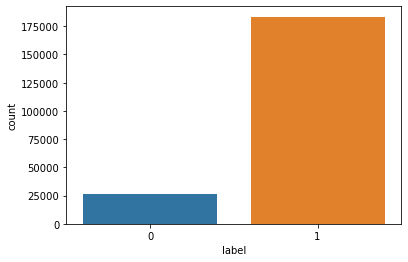

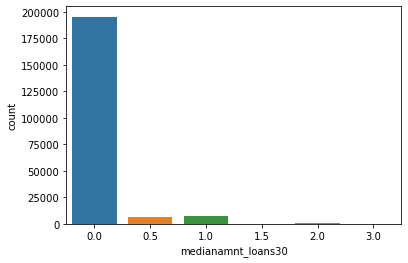

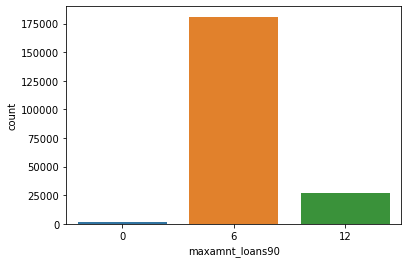

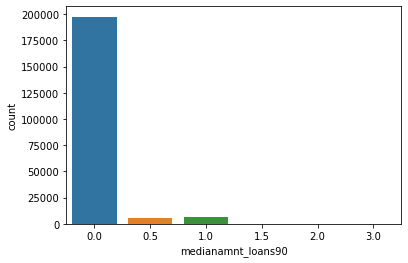

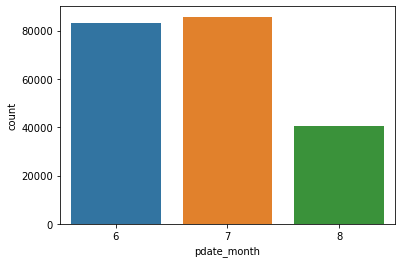

In [16]:
# Visualizing value counts for object type the columns
for i in df.columns :
    if df[i].nunique()<15 :
        #plt.figure(figsize=(15,4))
        sns.countplot(df[i])
        plt.show()

With the countplot we can see that 'medianamnt_loans30' column has 0.0 Median of amounts of loan taken by the user in last 30 days in majority and other values have very less count comparatively. Column 'maxamnt_loans90' has 6 as maximum amount of loan taken by the user in last 90 days n a very high count and other values comparatively have very less count. Column 'medianamnt_loans90' has 0.0 as Median of amounts of loan taken by the user in last 90 days in a very high count as compared to other values. There are 3 'pdate_months' June, July,August out of which July has highest count followed by June and least count is in August. This kind of distribution could result in skewness.

Column 'label' 1 (Non-defaulter) has a huge count compared to 0 (Defaulter) and since this is a target variable this columns needs class balancing.

<AxesSubplot:>

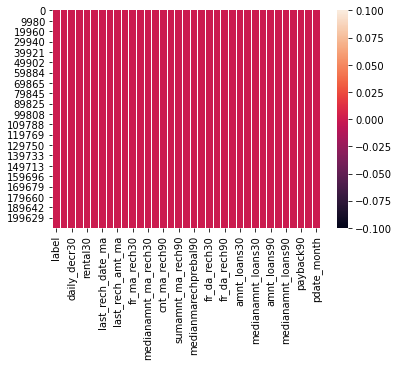

In [17]:
# Visualizing nulls
sns.heatmap(df.isnull())

Heatmap showing 0 null values in the dataset.

In [18]:
# Describe dataset
df.describe()
#df.describe(include='all')

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month
count,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,...,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000
mean,0.875297,8113.512796,5382.170031,6083.386523,2692.964058,3483.905668,3756.403389,3712.752058,2064.754512,3.978622,...,274.698489,0.054037,18.523497,23.647923,6.703238,0.046084,3.399125,4.321920,14.399514,6.797406
std,0.330383,75701.620014,9221.086606,10919.382966,4308.784971,5770.737718,53909.859829,53378.762010,2370.831005,4.256138,...,4245.577376,0.218054,224.813949,26.470977,2.104003,0.200706,8.813867,10.308399,8.438943,0.741434
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
25%,1.000000,246.000000,42.480000,42.713250,280.800000,300.370000,1.000000,0.000000,770.000000,1.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.000000,6.000000
50%,1.000000,527.000000,1470.465667,1500.000000,1083.940000,1334.400000,3.000000,0.000000,1539.000000,3.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.000000,7.000000
75%,1.000000,982.000000,7246.000000,7804.000000,3357.452500,4202.537500,7.000000,0.000000,2309.000000,5.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.000000,7.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.000000,8.000000


'label' has values 0 and 1, 'aon' ranges from -48 to 999860.755168, 'daily_decr30' ranges from -93.012667 to 265926, 'daily_decr90' ranges from -93.012667 to 320630, 'rental30' ranges from -23737.140000 to 198926.110000, 'rental90' ranges from -24720.580000 to 200148.110000, 'last_rech_date_ma' ranges from -29.000000 to 998650.377733, 'last_rech_date_da' -29.000000 to 999171.809410, 'last_rech_amt_ma' ranges from 0-55000, 'cnt_ma_rech30' ranges from 0-203, 'maxamnt_loans30' ranges from 0-99864.560864, 'medianamnt_loans30' ranges from 0 to 3, 'cnt_loans90' ranges from 0-4997.517944, 'amnt_loans90' ranges from 0-438, 'maxamnt_loans90' ranges from 0-12, 'medianamnt_loans90' ranges from 0-3, 'payback30' ranges from 0-171.500000, 'payback90' ranges from 0-171.500000, 'pdate_day' ranges from 1-31, 'pdate_month' ranges from 6-8.

Columns aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma, maxamnt_loans30, cnt_loans90, amnt_loans90, payback30, payback90 have mean>median hence right skewness is there and the difference between 75% and max values are high for some of the columns hence outliers might be there.

Standard deviation seem high for aon, daily_decr30, daily_decr90, rental30, rental90, last_rech_date_ma, last_rech_date_da, last_rech_amt_ma, maxamnt_loans30, cnt_loans90.

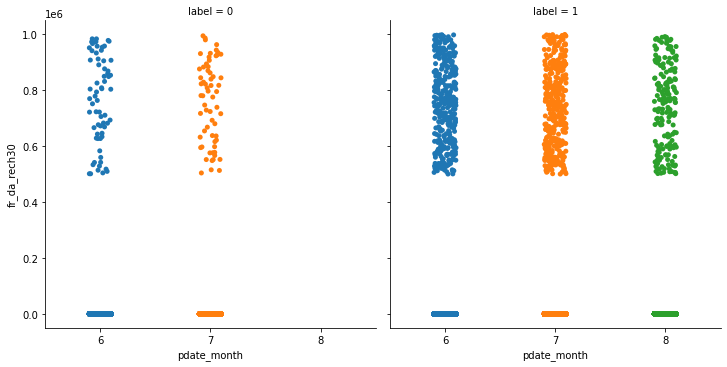

In [19]:
# Category plot for categorical data
sns.catplot(x='pdate_month',y='fr_da_rech30',data=df, col='label')

Frequency of data account recharged in last 30 days is highest for the users paid back the credit amount within 5 days of issuing the loan that is also highest in July month and lowest in August month. Users did not pay back the credit amount within 5 days of issuing the loan have 0 Frequency of data account recharged in last 30 days and very few in other months.

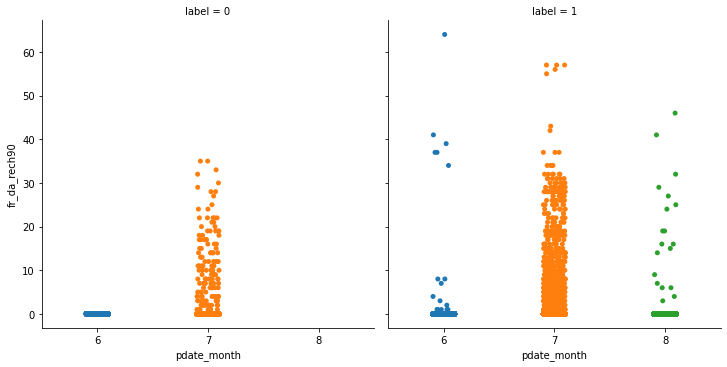

In [20]:
sns.catplot(x='pdate_month',y='fr_da_rech90',data=df, col='label')

Number of times data account got recharged in last 90 days is highest for the users paid back the credit amount within 5 days of issuing the loan in July month and few in other months. Users did not pay back the credit amount within 5 days of issuing the loan have 0 Number of times data account got recharged in last 90 days in August and count is comparatively high in the month of July and very few in June month.

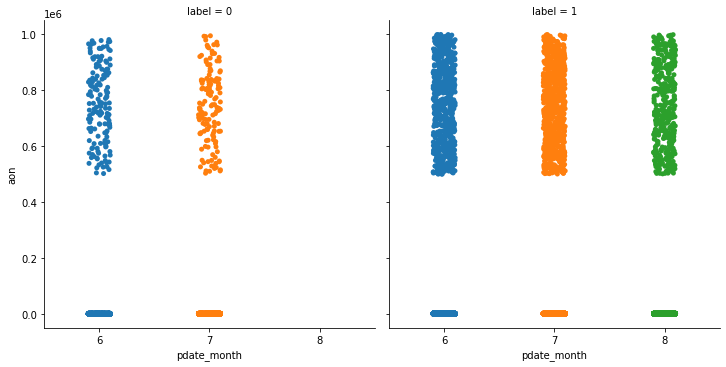

In [21]:
sns.catplot(x='pdate_month',y='aon',data=df, col='label')

Majority of age on cellular network in days is majorly for the users paid back the credit amount within 5 days of issuing the loan and highest n the month of July. Users did not paid back the credit amount within 5 days of issuing the loan have no count in the month of August they lie in June and July months.

In [22]:
# Pivot table showing counts
pd.crosstab(df['label'],df['medianamnt_loans30'])

medianamnt_loans30,0.0,0.5,1.0,1.5,2.0,3.0
label,,,,,,
0,25173,440,520,0,0,0
1,170241,6098,6629,38,420,3


0.0 as Median of amounts of loan taken by the user in last 30 days has the highest count of the users that paid back and did not paid back the credit amount within 5 days of issuing the loan. There are no user that has not paid back the credit amount within 5 days of issuing the loan with the median amount of 1.5, 2.0 and 3.0 .

In [23]:
pd.crosstab(df['label'],df['maxamnt_loans90'])

maxamnt_loans90,0,6,12
label,,,
0,0,25111,1022
1,2043,155803,25583


Maximum amount of loan taken by the users that paid back and did not paid back the credit amount within 5 days of issuing the loan, in last 90 days is highest for 6 as maximum amount followed by 12. 

In [24]:
pd.crosstab(df['pdate_month'],df['medianamnt_loans90'])

medianamnt_loans90,0.0,0.5,1.0,1.5,2.0,3.0
pdate_month,,,,,,
6,77789,2477,2863,0,0,0
7,81552,2286,1922,0,0,0
8,38052,905,1387,19,307,3


Median of amounts of loan taken by the user in last 90 days as 0.0 is highest in all the mentioned months but among these months July has the highest count followed by June and lastly August. Median of amounts of loan taken by the user in last 90 days above 1.0 has no users in the months June and July but August has few count.

In [25]:
pd.crosstab(df['pdate_month'],df['maxamnt_loans90'])

maxamnt_loans90,0,6,12
pdate_month,,,
6,23,82627,479
7,385,72370,13005
8,1635,25917,13121


Maximum amount of loan taken by the user in last 90 days as 6 has highest count in all the months data givenfollowed by 12 as maximum amount of loan taken by the user in last 90 days and least counts are in 0. Maximum amount of loan of 0 has highest cont in August, Maximum amount 6 has highest count in June and Maximum amount 12 has highest count in August.

<AxesSubplot:xlabel='medianamnt_loans30', ylabel='medianamnt_loans90'>

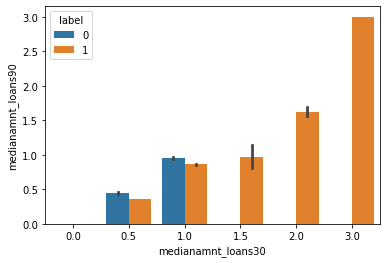

In [26]:
# Barplot
sns.barplot(x='medianamnt_loans30',y='medianamnt_loans90',data=df, hue='label')

Median of amounts of loan taken by the user in last 30 days as 0.5 and 1.0 only has the users who did not pay back the credit amount within 5 days of issuing the loan having higher Median of amounts of loan taken by the user in last 90 days comparatively. There are no users in 0.0 as medianamnt_loans30 and medianamnt_loans90. There are no users who did not pay back the credit amount within 5 days of issuing the loan in medianamnt_loans30 above 1.0.

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='maxamnt_loans30'>

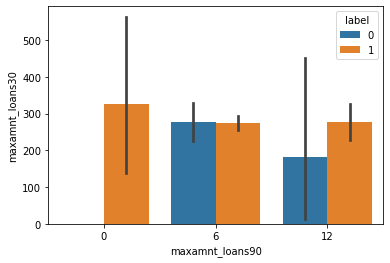

In [27]:
sns.barplot(x='maxamnt_loans90',y='maxamnt_loans30',data=df, hue='label')

There are no users who did not pay back the credit amount within 5 days of issuing the loan where maxamnt_loans90 is 0. maxamnt_loans30 is highest for 0 as maxamnt_loans90 where all the users have paid back the credit amount within 5 days of issuing the loan.

<AxesSubplot:xlabel='medianamnt_loans30', ylabel='payback30'>

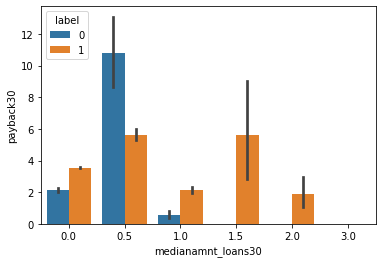

In [28]:
sns.barplot(x='medianamnt_loans30',y='payback30',data=df, hue='label')

Median of amounts of loan taken by the user in last 30 days above 1.0 has no users who did not pay back the credit amount within 5 days of issuing the loan, they lie in the range of 0 to 1. Users who did not pay back the credit amount within 5 days of issuing the loan has highest Average payback time in days over last 30 days at medianamnt_loans30 as 0.5. 

<AxesSubplot:xlabel='medianamnt_loans90', ylabel='payback90'>

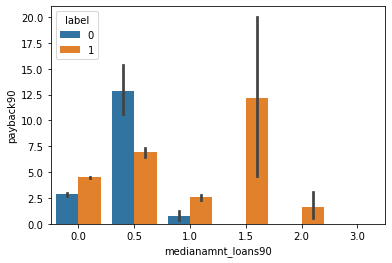

In [29]:
sns.barplot(x='medianamnt_loans90',y='payback90',data=df, hue='label')

Median of amounts of loan taken by the user in last 90 days above 1.0 has no users who did not pay back the credit amount within 5 days of issuing the loan, they lie in the range of 0 to 1. Users who did not pay back the credit amount within 5 days of issuing the loan has highest Average payback time in days over last 90 days at medianamnt_loans30 as 0.5. Users who paid back the credit amount within 5 days of issuing the loan has highest payback90 when medianamnt_loans90 is 1.5.

<AxesSubplot:xlabel='medianamnt_loans90', ylabel='sumamnt_ma_rech90'>

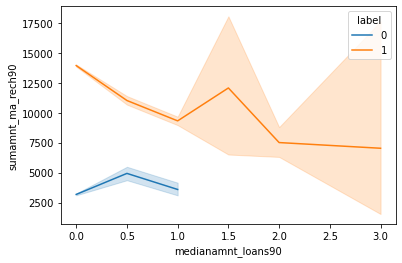

In [30]:
# Lineplot
sns.lineplot(x='medianamnt_loans90',y='sumamnt_ma_rech90',data=df,hue='label')

Total amount of recharge in main account over last 90 days (in Indonasian Rupiah) decreases with increase in Median of amounts of loan taken by the user in last 90 days with a hike in between where Median of amounts of loan taken by the user in last 90 days is 1.5 for the users paid back the credit amount within 5 days of issuing the loan. For the users did not pay back the credit amount within 5 days of issuing the loan medianamnt_loans90 lies between 0.0 to 1.0 and sumamnt_ma_rech90 first increases till the peak and then again decreases. sumamnt_ma_rech90 has a huge difference of amounts for the defaulters and non-defaulters. 

<AxesSubplot:xlabel='medianamnt_loans30', ylabel='payback30'>

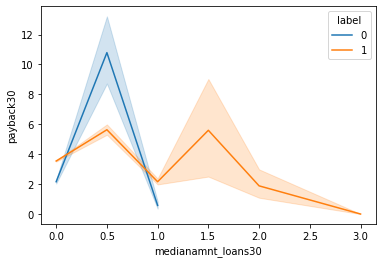

In [31]:
sns.lineplot(x='medianamnt_loans30',y='payback30',data=df,hue='label')

Average payback time in days over last 30 days decreases with increase in Median of amounts of loan taken by the user in last 30 days with hikes in between where Median of amounts of loan taken by the user in last 30 days is 0.5 and 1.5 for the users paid back the credit amount within 5 days of issuing the loan. For the users did not pay back the credit amount within 5 days of issuing the loan Average payback time in days over last 30 days lies between 2 to 12 and medianamnt_loans30 lies between 0.0 to 1.0 and payback30 first increases till the peak and then again decreases. 

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='daily_decr90'>

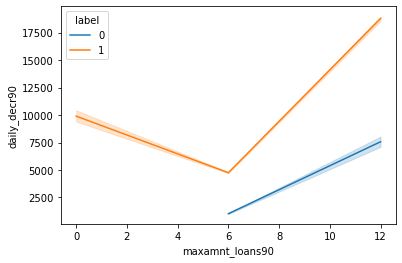

In [32]:
sns.lineplot(x='maxamnt_loans90',y='daily_decr90',data=df,hue='label')

Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah) for the users paid back the credit amount within 5 days of issuing the loan first decreases and then increases linearly to the highest amount with increase in maximum amount of loan taken by the user in last 90 days. For the users did not pay back the credit amount within 5 days of issuing the loan maxamnt_loans90 is in the range of 6 to 12 which is increasing with the increase in daily_decr90. Daily amount spent from main account, averaged over last 90 days has amount difference for defaulters and non-defaulters.

In [33]:
# Dividing the data in dependent and independent columns for further analysis
# Dropping target column for now
df_indep=df.drop('label',axis=1)
df_indep.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6


In [34]:
# Checking outliers
from scipy.stats import zscore

z=np.abs(zscore(df_indep))
np.where(z>3)

(array([    21,     22,     22, ..., 209555, 209556, 209556], dtype=int64),
 array([14, 14, 31, ..., 27, 25, 29], dtype=int64))

In [35]:
# Checking the outlier in the dataset
z[21][14]

4.470093965186231

In [36]:
# Checking outliers using quantiles
for i in df_indep.columns :
    print(i,'\n',df_indep[i].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]))

aon 
 0.0       -48.000000
0.1       132.000000
0.2       204.000000
0.3       292.000000
0.4       400.000000
0.5       527.000000
0.6       682.000000
0.7       869.000000
0.8      1113.000000
0.9      1411.000000
1.0    999860.755168
Name: aon, dtype: float64
daily_decr30 
 0.0       -93.012667
0.1         8.800000
0.2        27.967000
0.3        64.330800
0.4       255.392000
0.5      1470.465667
0.6      3171.208133
0.7      5617.680800
0.8      9232.332800
0.9     15591.651600
1.0    265926.000000
Name: daily_decr30, dtype: float64
daily_decr90 
 0.0       -93.012667
0.1         8.946667
0.2        28.170200
0.3        64.615267
0.4       257.762733
0.5      1500.000000
0.6      3286.000000
0.7      5966.928000
0.8     10122.464000
0.9     17786.932000
1.0    320630.000000
Name: daily_decr90, dtype: float64
rental30 
 0.0    -23737.140
0.1        43.780
0.2       191.380
0.3       391.513
0.4       674.050
0.5      1083.940
0.6      1686.816
0.7      2634.834
0.8      4199.434
0.

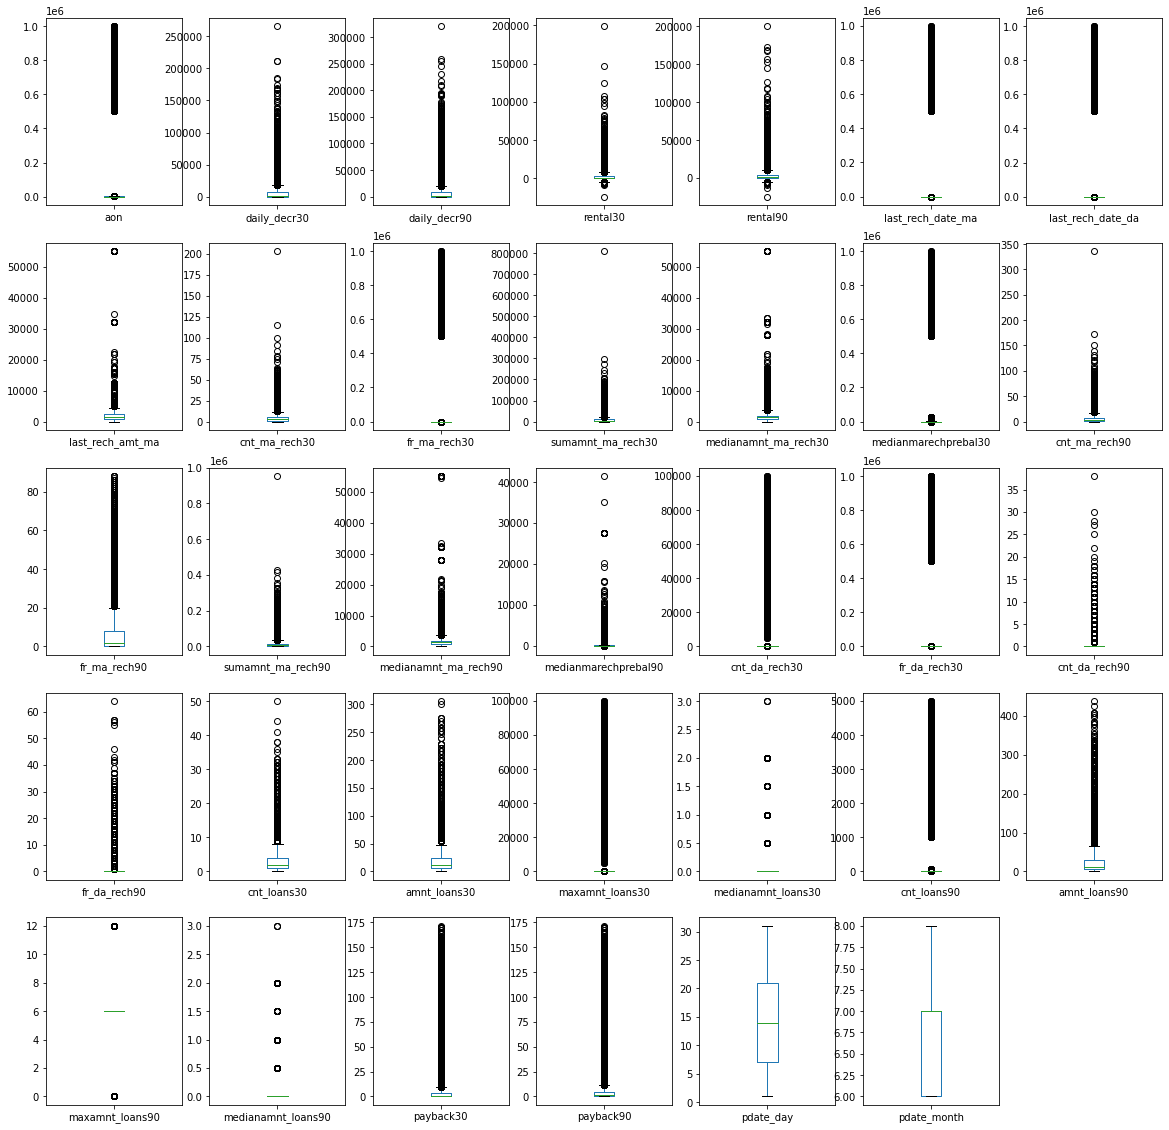

In [37]:
# Visualising outliers
df_indep.plot(kind='box',subplots=True,layout=(5,7), figsize=(20,20))
plt.show()

Plot showing there are presence of outliers in the columns : 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_amt_ma', 'cnt_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30','cnt_ma_rech90','sumamnt_ma_rech90', 'medianamnt_ma_rech90','medianmarechprebal90','cnt_da_rech90','fr_da_rech90'.

In [38]:
# Checking skewness
df_indep.skew()

aon                     10.392159
daily_decr30             3.945997
daily_decr90             4.252312
rental30                 4.521743
rental90                 4.437471
last_rech_date_ma       14.789865
last_rech_date_da       14.813747
last_rech_amt_ma         3.781206
cnt_ma_rech30            3.283935
fr_ma_rech30            14.771725
sumamnt_ma_rech30        6.386845
medianamnt_ma_rech30     3.512361
medianmarechprebal30    14.778767
cnt_ma_rech90            3.425285
fr_ma_rech90             2.285206
sumamnt_ma_rech90        4.897896
medianamnt_ma_rech90     3.752792
medianmarechprebal90    44.877678
cnt_da_rech30           17.817034
fr_da_rech30            14.775322
cnt_da_rech90           27.265281
fr_da_rech90            28.985932
cnt_loans30              2.713259
amnt_loans30             2.975560
maxamnt_loans30         17.656733
medianamnt_loans30       4.550661
cnt_loans90             16.593169
amnt_loans90             3.149830
maxamnt_loans90          1.678078
medianamnt_loa

Skewness is present in the dataset as acceptable range is +/-0.5, but here we can see hgh skewness so we can change the threshold as per the kind of data distribution in particular column.

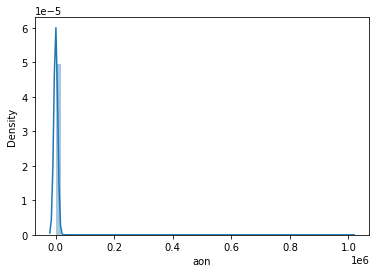

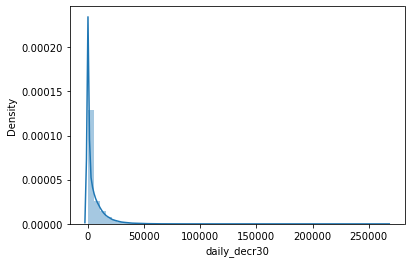

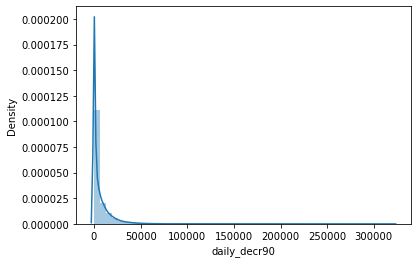

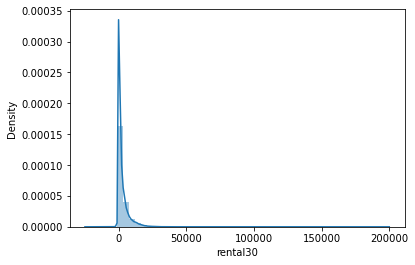

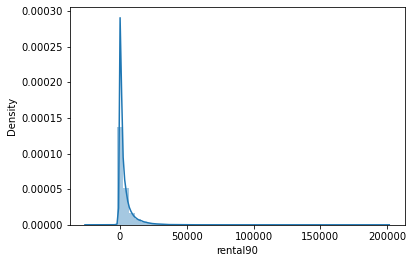

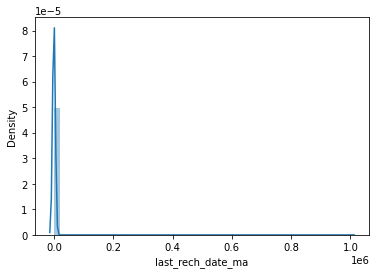

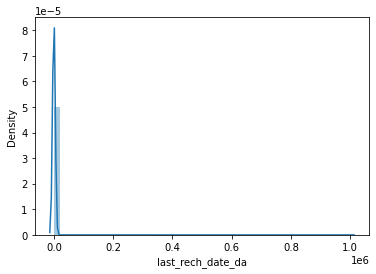

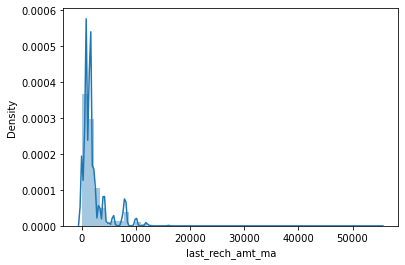

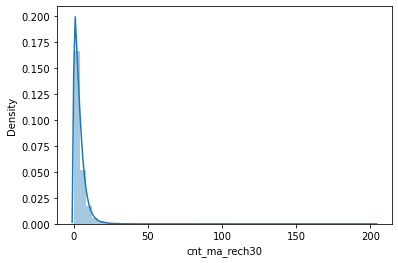

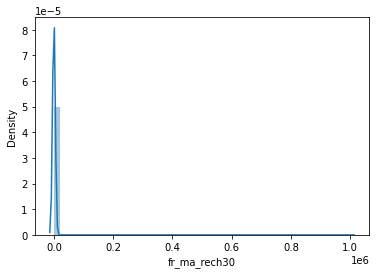

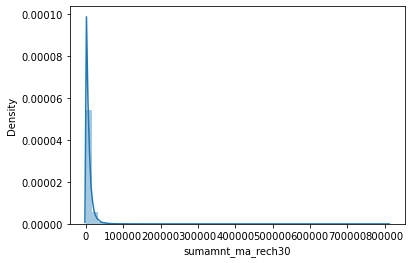

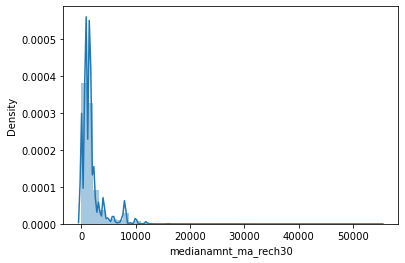

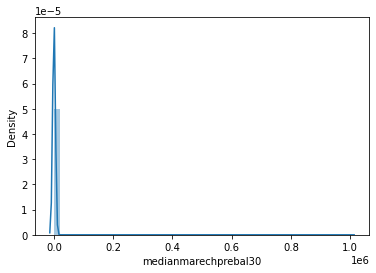

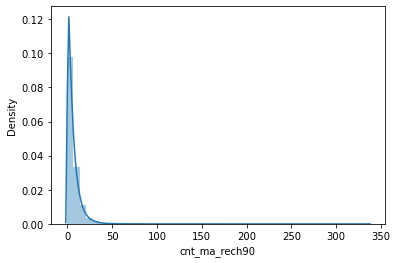

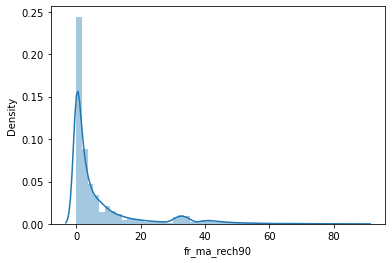

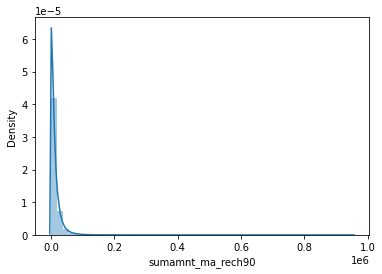

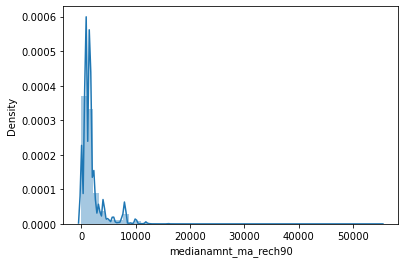

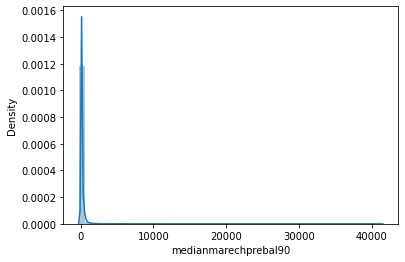

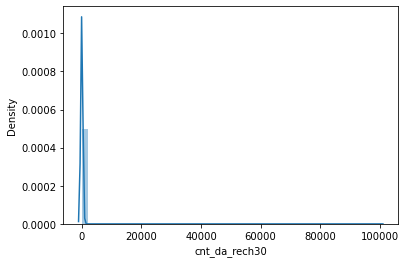

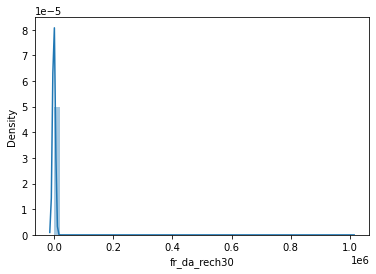

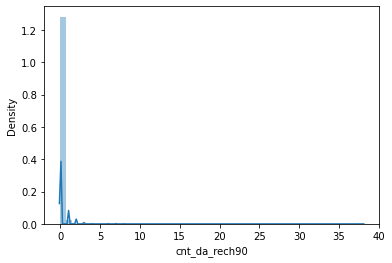

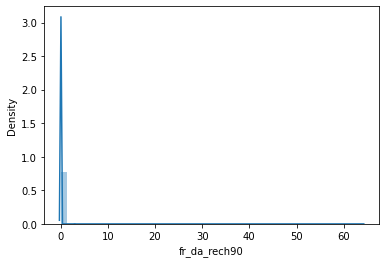

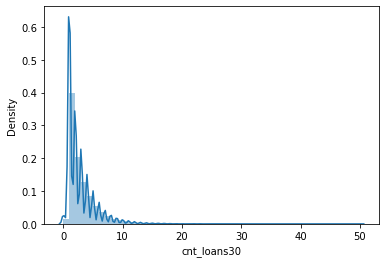

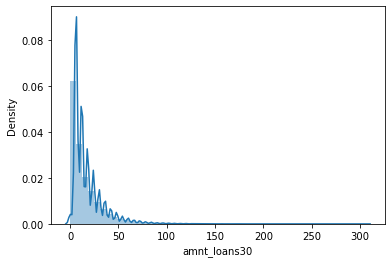

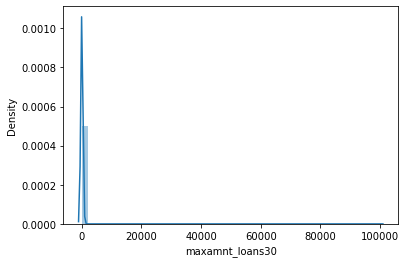

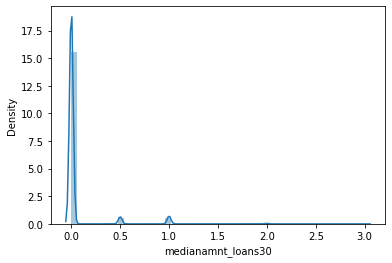

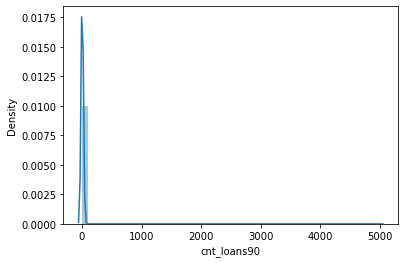

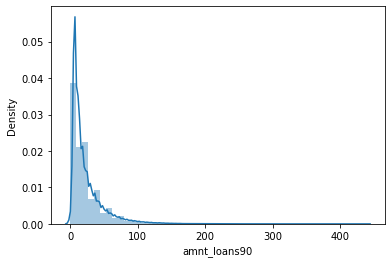

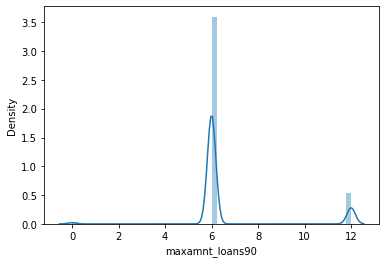

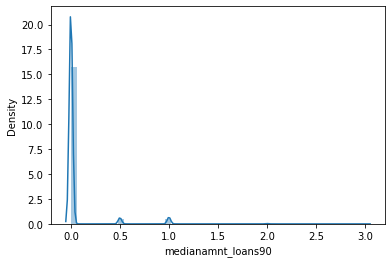

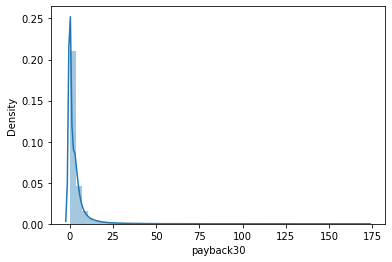

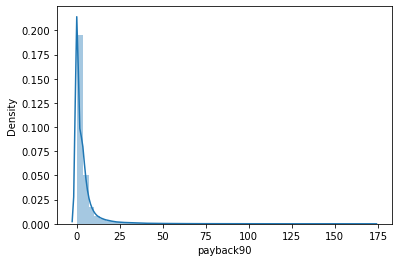

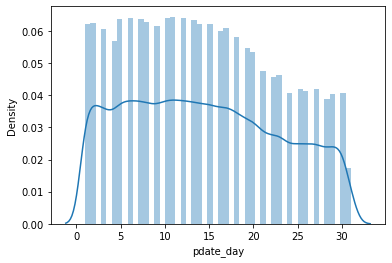

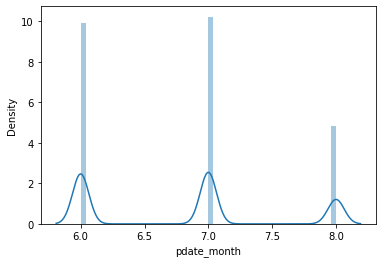

In [39]:
# Visualizing skewness
for i in df_indep.columns :
    sns.distplot(df_indep[i])
    plt.show()

Data seems skewed in all the columns.

### Data Cleaning

In [40]:
# Creting different datasets for the columns having outliers and not having outliers

df_outliers=df_indep[['daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_amt_ma','cnt_ma_rech30', 
                      'sumamnt_ma_rech30', 'medianamnt_ma_rech30','cnt_ma_rech90','sumamnt_ma_rech90', 
                      'medianamnt_ma_rech90','medianmarechprebal90','cnt_da_rech90','fr_da_rech90']].copy()

df_rem=df_indep[['aon', 'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30', 'medianmarechprebal30',
       'fr_ma_rech90', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pdate_day', 'pdate_month']]

In [41]:
# Removing outliers (Changed the threshold value based on the amount of data loss)

df1=df_outliers[(z<6).all(axis=1)]
df1

,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90
0,3055.050000,3065.150000,220.13,260.13,1539,2,3078.0,1539.0,2,3078,1539.0,7.50,0,0
1,12122.000000,12124.750000,3691.26,3691.26,5787,1,5787.0,5787.0,1,5787,5787.0,61.04,0,0
2,1398.000000,1398.000000,900.13,900.13,1539,1,1539.0,1539.0,1,1539,1539.0,66.32,0,0
3,21.228000,21.228000,159.42,159.42,947,0,0.0,0.0,1,947,947.0,2.50,0,0
4,150.619333,150.619333,1098.90,1098.90,2309,7,20029.0,2309.0,8,23496,2888.0,35.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,151.872333,151.872333,1089.19,1089.19,4048,3,10404.0,3178.0,3,10404,3178.0,91.81,0,0
209589,36.936000,36.936000,1728.36,1728.36,773,4,3092.0,773.0,6,4038,773.0,111.80,0,0
209590,11843.111667,11904.350000,5861.83,8893.20,1539,5,9334.0,1539.0,11,18592,1539.0,47.13,0,0
209591,12488.228333,12574.370000,411.83,984.58,773,5,12154.0,773.0,6,17941,2410.5,100.00,1,0


In [42]:
# Printing shape of dataset before and after removing outliers
print('Shape of original dataset : ',df_indep.shape)
print('Shape of dataset after removing outliers : ',df1.shape)

Shape of original dataset :  (209562, 34)
Shape of dataset after removing outliers :  (193875, 14)


In [43]:
# Percentage Data Lost
data_percent=(209562-193875)/209562*100
data_percent

7.485612849657858

Approx 7% data is lost after removing the outliers.

In [44]:
# Combining data in one to treat skewness
df1=pd.concat([df1,df_rem],axis=1)

# Checking and treating the nulls created due to outliers removal
df1.dropna(axis=0, inplace=True)
df1.isnull().sum().any()

False

Nulls are trated successfully

In [45]:
# Checking skewness after removing outliers
df1.skew()[:40]

daily_decr30             2.453587
daily_decr90             2.594913
rental30                 2.631232
rental90                 2.759101
last_rech_amt_ma         2.248340
cnt_ma_rech30            1.829432
sumamnt_ma_rech30        2.280010
medianamnt_ma_rech30     2.455302
cnt_ma_rech90            1.989286
sumamnt_ma_rech90        2.353928
medianamnt_ma_rech90     2.467532
medianmarechprebal90     5.478768
cnt_da_rech90            7.423611
fr_da_rech90            68.980093
aon                      0.947758
last_rech_date_ma        3.107282
last_rech_date_da        9.967052
fr_ma_rech30             2.015235
medianmarechprebal30    10.837951
fr_ma_rech90             2.259668
cnt_da_rech30           34.807421
fr_da_rech30            88.486569
cnt_loans30              2.061372
amnt_loans30             2.093381
maxamnt_loans30         36.617557
medianamnt_loans30       4.081899
cnt_loans90             44.701974
amnt_loans90             2.333297
maxamnt_loans90          1.733629
medianamnt_loa

We can see skewness is present in all the columns due to the kind of data distribution in the dataset.

In [46]:
# Removing skewness
df2=df1.copy()
for i in df2.columns :
    if (df1[i].skew()>0.5):
        df2[i]=np.sqrt(df1[i])
        #df2[i]=np.log(df1[i]+1)
print(df2.skew()[:35])

daily_decr30             0.934234
daily_decr90             1.020350
rental30                 1.094382
rental90                 1.155275
last_rech_amt_ma         0.664766
cnt_ma_rech30            0.170682
sumamnt_ma_rech30        0.461559
medianamnt_ma_rech30     0.518854
cnt_ma_rech90            0.398618
sumamnt_ma_rech90        0.630140
medianamnt_ma_rech90     0.634858
medianmarechprebal90     1.808518
cnt_da_rech90            6.764699
fr_da_rech90            61.553351
aon                      0.332050
last_rech_date_ma        1.334891
last_rech_date_da        7.599943
fr_ma_rech30             0.611942
medianmarechprebal30     2.089995
fr_ma_rech90             1.028892
cnt_da_rech30           31.474821
fr_da_rech30            79.504634
cnt_loans30              0.900052
amnt_loans30             0.920976
maxamnt_loans30         32.407195
medianamnt_loans30       3.694007
cnt_loans90             13.840344
amnt_loans90             1.143576
maxamnt_loans90         -0.941005
medianamnt_loa

Skewness is still there in columns : fr_da_rech90,cnt_da_rech30,fr_da_rech30,maxamnt_loans30.

In [47]:
# Again removing skewness
df2['fr_da_rech90']=np.sqrt(df2['fr_da_rech90'])
df2['cnt_da_rech30']=np.log(df2['cnt_da_rech30']+1)
df2['fr_da_rech30']=np.sqrt(df2['fr_da_rech30'])
df2['maxamnt_loans30']=np.log(df2['maxamnt_loans30']+1)
df2['cnt_loans90']=np.log(df2['cnt_loans90']+1)
df2.skew()

daily_decr30             0.934234
daily_decr90             1.020350
rental30                 1.094382
rental90                 1.155275
last_rech_amt_ma         0.664766
cnt_ma_rech30            0.170682
sumamnt_ma_rech30        0.461559
medianamnt_ma_rech30     0.518854
cnt_ma_rech90            0.398618
sumamnt_ma_rech90        0.630140
medianamnt_ma_rech90     0.634858
medianmarechprebal90     1.808518
cnt_da_rech90            6.764699
fr_da_rech90            58.590892
aon                      0.332050
last_rech_date_ma        1.334891
last_rech_date_da        7.599943
fr_ma_rech30             0.611942
medianmarechprebal30     2.089995
fr_ma_rech90             1.028892
cnt_da_rech30           23.353120
fr_da_rech30            75.953266
cnt_loans30              0.900052
amnt_loans30             0.920976
maxamnt_loans30          1.812613
medianamnt_loans30       3.694007
cnt_loans90              0.643391
amnt_loans90             1.143576
maxamnt_loans90         -0.941005
medianamnt_loa

In [48]:
# Again removing skewness
df2['fr_da_rech90']=np.sqrt(df2['fr_da_rech90'])
df2['cnt_da_rech30']=np.log(df2['cnt_da_rech30']+1)
df2['fr_da_rech30']=np.sqrt(df2['fr_da_rech30'])

# Again removing skewness
df2['fr_da_rech90']=np.sqrt(df2['fr_da_rech90'])
df2['cnt_da_rech30']=np.log(df2['cnt_da_rech30']+1)
df2['fr_da_rech30']=np.sqrt(df2['fr_da_rech30'])

df2.skew()

daily_decr30             0.934234
daily_decr90             1.020350
rental30                 1.094382
rental90                 1.155275
last_rech_amt_ma         0.664766
cnt_ma_rech30            0.170682
sumamnt_ma_rech30        0.461559
medianamnt_ma_rech30     0.518854
cnt_ma_rech90            0.398618
sumamnt_ma_rech90        0.630140
medianamnt_ma_rech90     0.634858
medianmarechprebal90     1.808518
cnt_da_rech90            6.764699
fr_da_rech90            57.390713
aon                      0.332050
last_rech_date_ma        1.334891
last_rech_date_da        7.599943
fr_ma_rech30             0.611942
medianmarechprebal30     2.089995
fr_ma_rech90             1.028892
cnt_da_rech30           11.532384
fr_da_rech30            74.517830
cnt_loans30              0.900052
amnt_loans30             0.920976
maxamnt_loans30          1.812613
medianamnt_loans30       3.694007
cnt_loans90              0.643391
amnt_loans90             1.143576
maxamnt_loans90         -0.941005
medianamnt_loa

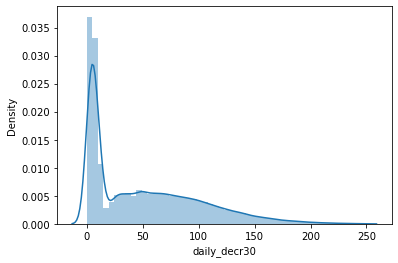

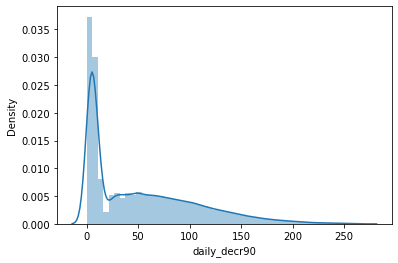

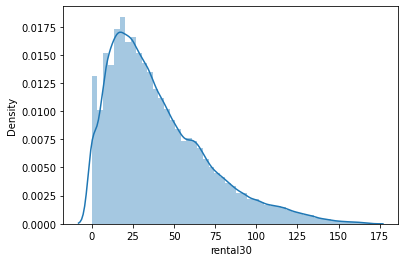

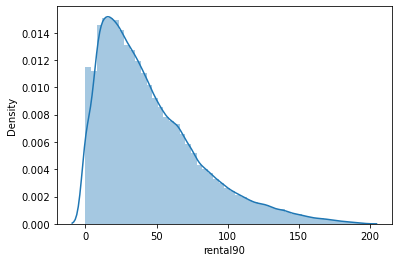

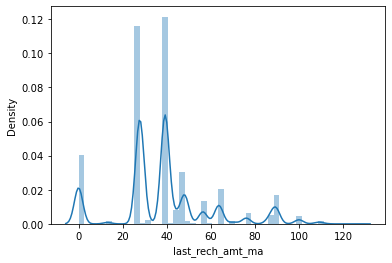

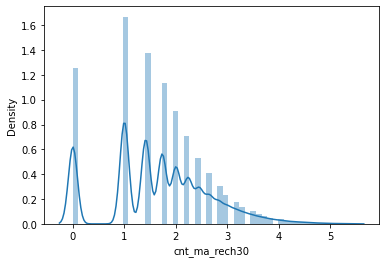

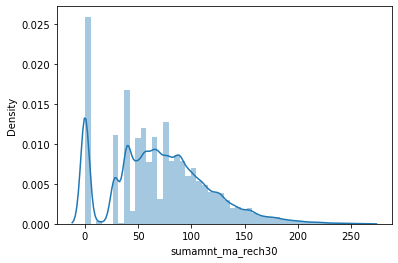

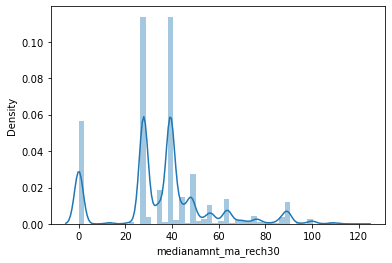

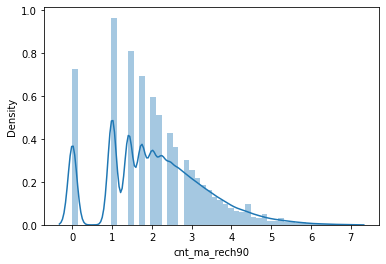

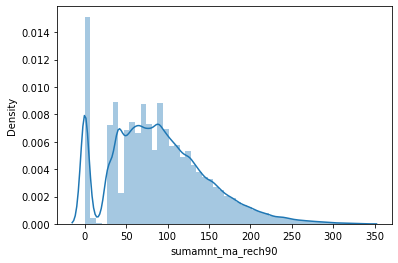

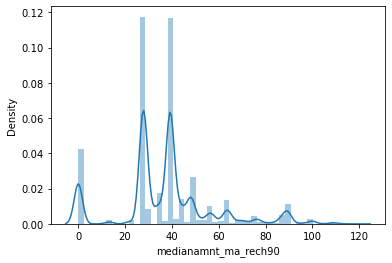

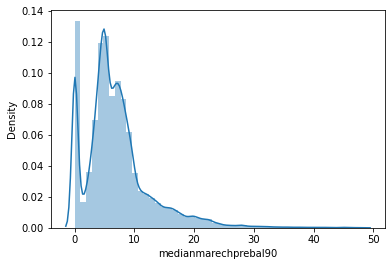

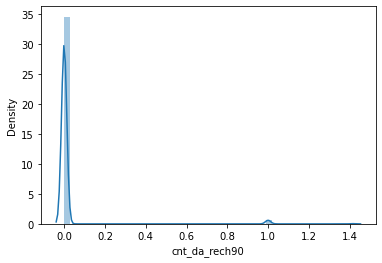

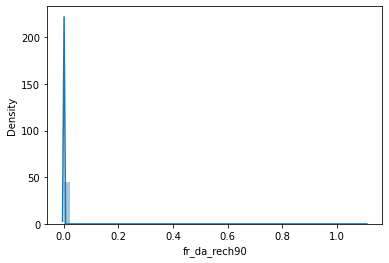

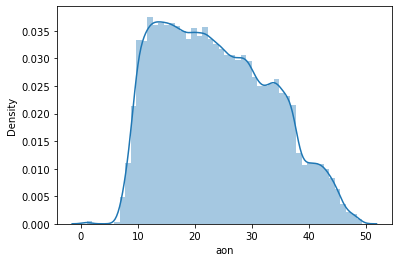

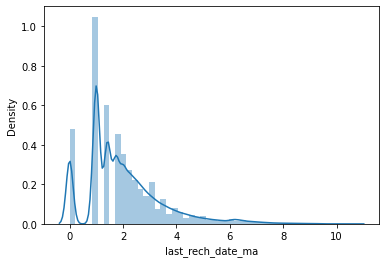

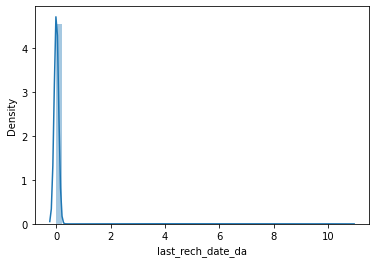

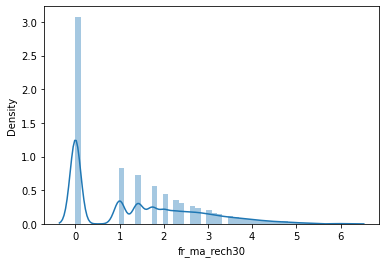

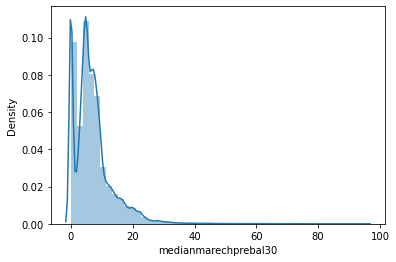

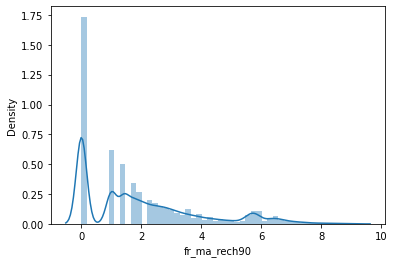

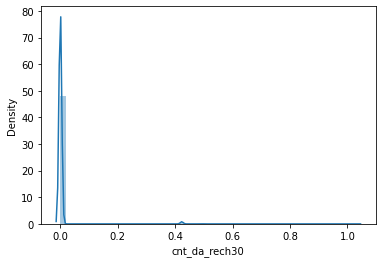

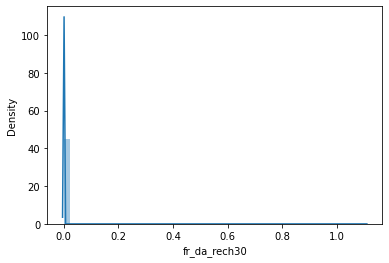

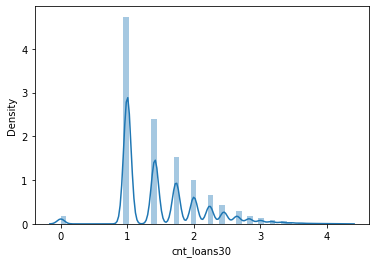

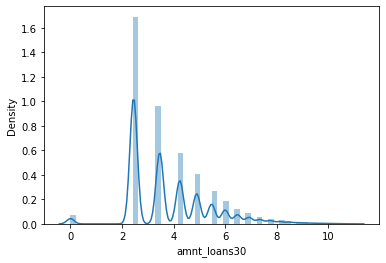

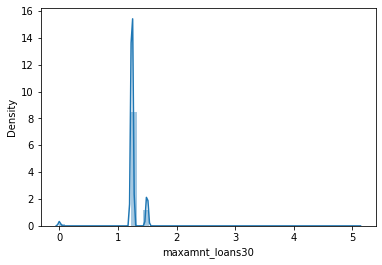

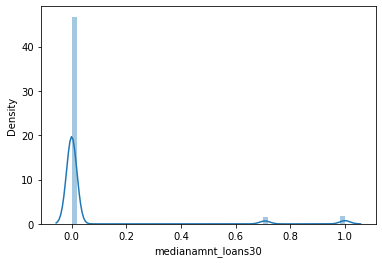

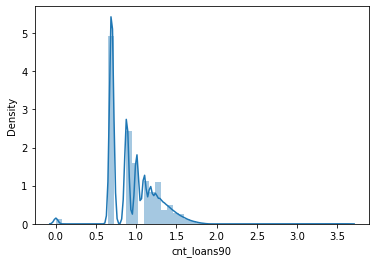

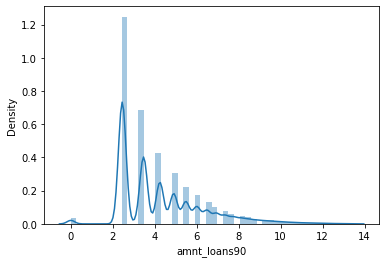

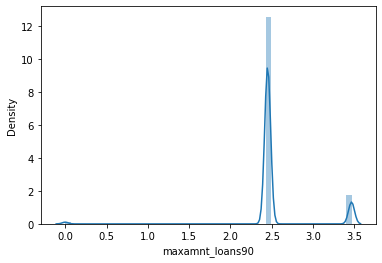

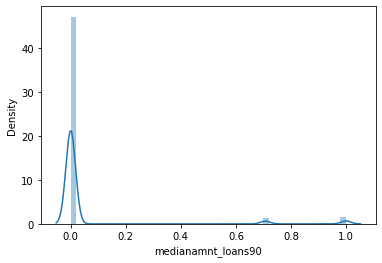

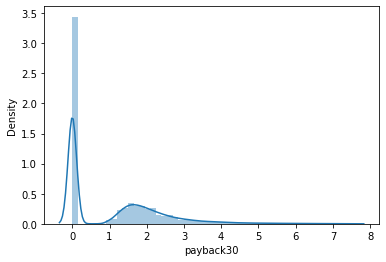

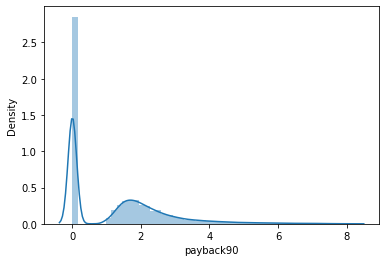

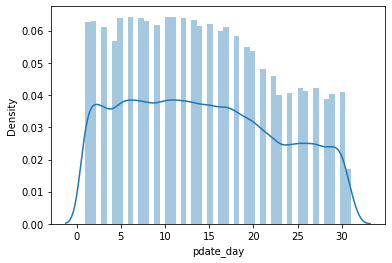

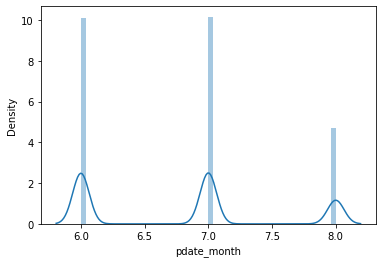

In [49]:
# Visualizng skewness
for i in df2.columns :
    sns.distplot(df2[i])
    plt.show()

Removed skewness from all columns but in columns fr_da_rech90,cnt_da_rech30,fr_da_rech30 no significant change is seen on further removing skewness due to the kind of data distribution. Hence we can consider the present values as skewness threshold.

In [50]:
# Checking the new dataset
df2

,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,sumamnt_ma_rech90,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month
0,55.272507,55.363797,14.836779,16.128546,39.230090,1.414214,55.479726,39.230090,1.414214,55.479726,...,1.238226,0.0,0.881374,3.464102,2.449490,0.0,5.385165,5.385165,20,7
1,110.099955,110.112443,60.755740,60.755740,76.072334,1.000000,76.072334,76.072334,1.000000,76.072334,...,1.496068,0.0,0.693147,3.464102,3.464102,0.0,0.000000,0.000000,10,8
2,37.389838,37.389838,30.002167,30.002167,39.230090,1.000000,39.230090,39.230090,1.000000,39.230090,...,1.238226,0.0,0.693147,2.449490,2.449490,0.0,0.000000,0.000000,19,8
3,4.607385,4.607385,12.626163,12.626163,30.773365,0.000000,0.000000,0.000000,1.000000,30.773365,...,1.238226,0.0,0.881374,3.464102,2.449490,0.0,0.000000,0.000000,6,6
4,12.272707,12.272707,33.149661,33.149661,48.052055,2.645751,141.523850,48.052055,2.828427,153.284050,...,1.238226,0.0,1.293562,6.480741,2.449490,0.0,1.527525,1.527525,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,12.323649,12.323649,33.002879,33.002879,63.623895,1.732051,102.000000,56.373753,1.732051,102.000000,...,1.238226,0.0,0.881374,3.464102,2.449490,0.0,1.000000,1.000000,17,6
209589,6.077499,6.077499,41.573549,41.573549,27.802878,2.000000,55.605755,27.802878,2.449490,63.545259,...,1.238226,0.0,1.005053,4.242641,2.449490,0.0,1.000000,1.000000,12,6
209590,108.826062,109.107058,76.562589,94.303765,39.230090,2.236068,96.612629,39.230090,3.316625,136.352484,...,1.496068,0.0,1.238226,7.348469,3.464102,0.0,2.000000,1.957890,29,7
209591,111.750742,112.135498,20.293595,31.378018,27.802878,2.236068,110.245181,27.802878,2.449490,133.944018,...,1.496068,0.0,1.005053,4.898979,3.464102,0.0,0.000000,3.240370,25,7


### Combining all the columns for further analysis

In [51]:
dff=pd.concat([df['label'],df2],axis=1)
dff.dropna(inplace=True)
dff.isnull().sum().any()

False

Combined all the columns and removed nulls

In [52]:
# Checking shape of new dataset
dff.shape

(182425, 35)

New dataset is having 979 rows and 35 columns.

In [53]:
# Checking dataset values
dff

,label,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month
0,0,55.272507,55.363797,14.836779,16.128546,39.230090,1.414214,55.479726,39.230090,1.414214,...,1.238226,0.0,0.881374,3.464102,2.449490,0.0,5.385165,5.385165,20.0,7.0
1,1,110.099955,110.112443,60.755740,60.755740,76.072334,1.000000,76.072334,76.072334,1.000000,...,1.496068,0.0,0.693147,3.464102,3.464102,0.0,0.000000,0.000000,10.0,8.0
2,1,37.389838,37.389838,30.002167,30.002167,39.230090,1.000000,39.230090,39.230090,1.000000,...,1.238226,0.0,0.693147,2.449490,2.449490,0.0,0.000000,0.000000,19.0,8.0
3,1,4.607385,4.607385,12.626163,12.626163,30.773365,0.000000,0.000000,0.000000,1.000000,...,1.238226,0.0,0.881374,3.464102,2.449490,0.0,0.000000,0.000000,6.0,6.0
4,1,12.272707,12.272707,33.149661,33.149661,48.052055,2.645751,141.523850,48.052055,2.828427,...,1.238226,0.0,1.293562,6.480741,2.449490,0.0,1.527525,1.527525,22.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,12.323649,12.323649,33.002879,33.002879,63.623895,1.732051,102.000000,56.373753,1.732051,...,1.238226,0.0,0.881374,3.464102,2.449490,0.0,1.000000,1.000000,17.0,6.0
209589,1,6.077499,6.077499,41.573549,41.573549,27.802878,2.000000,55.605755,27.802878,2.449490,...,1.238226,0.0,1.005053,4.242641,2.449490,0.0,1.000000,1.000000,12.0,6.0
209590,1,108.826062,109.107058,76.562589,94.303765,39.230090,2.236068,96.612629,39.230090,3.316625,...,1.496068,0.0,1.238226,7.348469,3.464102,0.0,2.000000,1.957890,29.0,7.0
209591,1,111.750742,112.135498,20.293595,31.378018,27.802878,2.236068,110.245181,27.802878,2.449490,...,1.496068,0.0,1.005053,4.898979,3.464102,0.0,0.000000,3.240370,25.0,7.0


### EDA and Visualizatons

In [54]:
# Describng the dataset
dff.describe()

,label,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month
count,182425.000000,182425.000000,182425.000000,182425.000000,182425.000000,182425.000000,182425.000000,182425.000000,182425.000000,182425.000000,...,182425.000000,182425.000000,182425.000000,182425.000000,182425.000000,182425.000000,182425.000000,182425.000000,182425.000000,182425.000000
mean,0.880976,51.944910,54.422093,41.080201,46.166469,38.889845,1.715060,71.701207,36.117908,2.161325,...,1.253992,0.056124,0.964801,4.360120,2.553093,0.047724,1.114146,1.307416,14.387332,6.817744
std,0.323818,49.611054,53.320205,30.604825,35.466610,21.352104,0.994719,45.525210,20.563382,1.251229,...,0.213718,0.215545,0.289899,2.098695,0.423735,0.199644,1.324305,1.443170,8.424011,0.739611
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
25%,1.000000,6.705197,6.718333,17.860571,19.145757,27.748874,1.000000,39.319207,27.748874,1.414214,...,1.238226,0.000000,0.693147,2.449490,2.449490,0.000000,0.000000,0.000000,7.000000,6.000000
50%,1.000000,40.163400,40.633730,33.695994,37.529055,39.230090,1.732051,68.036755,39.230090,2.000000,...,1.238226,0.000000,0.881374,3.464102,2.449490,0.000000,0.000000,1.341641,14.000000,7.000000
75%,1.000000,85.726309,89.126932,57.932029,64.905470,48.052055,2.236068,100.000000,43.863424,3.000000,...,1.238226,0.000000,1.174359,5.477226,2.449490,0.000000,1.957890,2.132007,21.000000,7.000000
max,1.000000,246.003114,267.495944,168.887389,195.192777,126.491106,5.385165,261.778532,118.055072,7.000000,...,5.083192,1.000000,3.636017,13.416408,3.464102,1.000000,7.483315,8.124038,31.000000,8.000000


In above table, statistcs summary is shown after cleaning and transforming the data.

In [55]:
# Checking correlation
dff.corr()

,label,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month
label,1.000000,0.215642,0.217188,0.095926,0.111934,0.217661,0.326776,0.317710,0.237395,0.333692,...,0.002945,0.041241,0.240188,0.244031,0.054403,0.031415,0.183088,0.188043,0.016119,0.145356
daily_decr30,0.215642,1.000000,0.991695,0.564506,0.614735,0.350670,0.461474,0.584544,0.368428,0.616408,...,0.129482,-0.006056,0.480443,0.575735,0.332172,-0.044804,0.233797,0.291287,-0.010338,0.729728
daily_decr90,0.217188,0.991695,1.000000,0.561076,0.624237,0.345038,0.448859,0.568997,0.360523,0.622012,...,0.124158,-0.002972,0.481183,0.579717,0.333144,-0.044302,0.226380,0.287742,-0.029760,0.750235
rental30,0.095926,0.564506,0.561076,1.000000,0.966135,0.225746,0.357250,0.408213,0.244474,0.432304,...,0.075784,-0.024753,0.330989,0.384861,0.203559,-0.050582,0.219769,0.253315,0.070501,0.418500
rental90,0.111934,0.614735,0.624237,0.966135,1.000000,0.228797,0.348470,0.395709,0.237922,0.464688,...,0.066353,-0.019863,0.347775,0.411462,0.215886,-0.051674,0.215832,0.269024,0.044315,0.509291
last_rech_amt_ma,0.217661,0.350670,0.345038,0.225746,0.228797,1.000000,0.243800,0.580203,0.802203,0.277775,...,0.039481,0.033664,0.121418,0.136059,0.132222,0.020623,0.076514,0.112982,0.053680,0.149086
cnt_ma_rech30,0.326776,0.461474,0.448859,0.357250,0.348470,0.243800,1.000000,0.824997,0.331664,0.908923,...,0.103273,-0.051732,0.661134,0.684075,0.161828,-0.063564,0.407049,0.355674,0.098418,0.164055
sumamnt_ma_rech30,0.317710,0.584544,0.568997,0.408213,0.395709,0.580203,0.824997,1.000000,0.677963,0.765039,...,0.130683,-0.025574,0.549620,0.587596,0.238178,-0.042221,0.306853,0.278829,0.094824,0.198000
medianamnt_ma_rech30,0.237395,0.368428,0.360523,0.244474,0.237922,0.802203,0.331664,0.677963,1.000000,0.299273,...,0.060463,0.037340,0.163190,0.170409,0.150587,0.020413,0.118768,0.155537,0.070152,0.143900
cnt_ma_rech90,0.333692,0.616408,0.622012,0.432304,0.464688,0.277775,0.908923,0.765039,0.299273,1.000000,...,0.099913,-0.044374,0.710279,0.760206,0.206299,-0.071565,0.365993,0.351595,0.064273,0.350210


<AxesSubplot:>

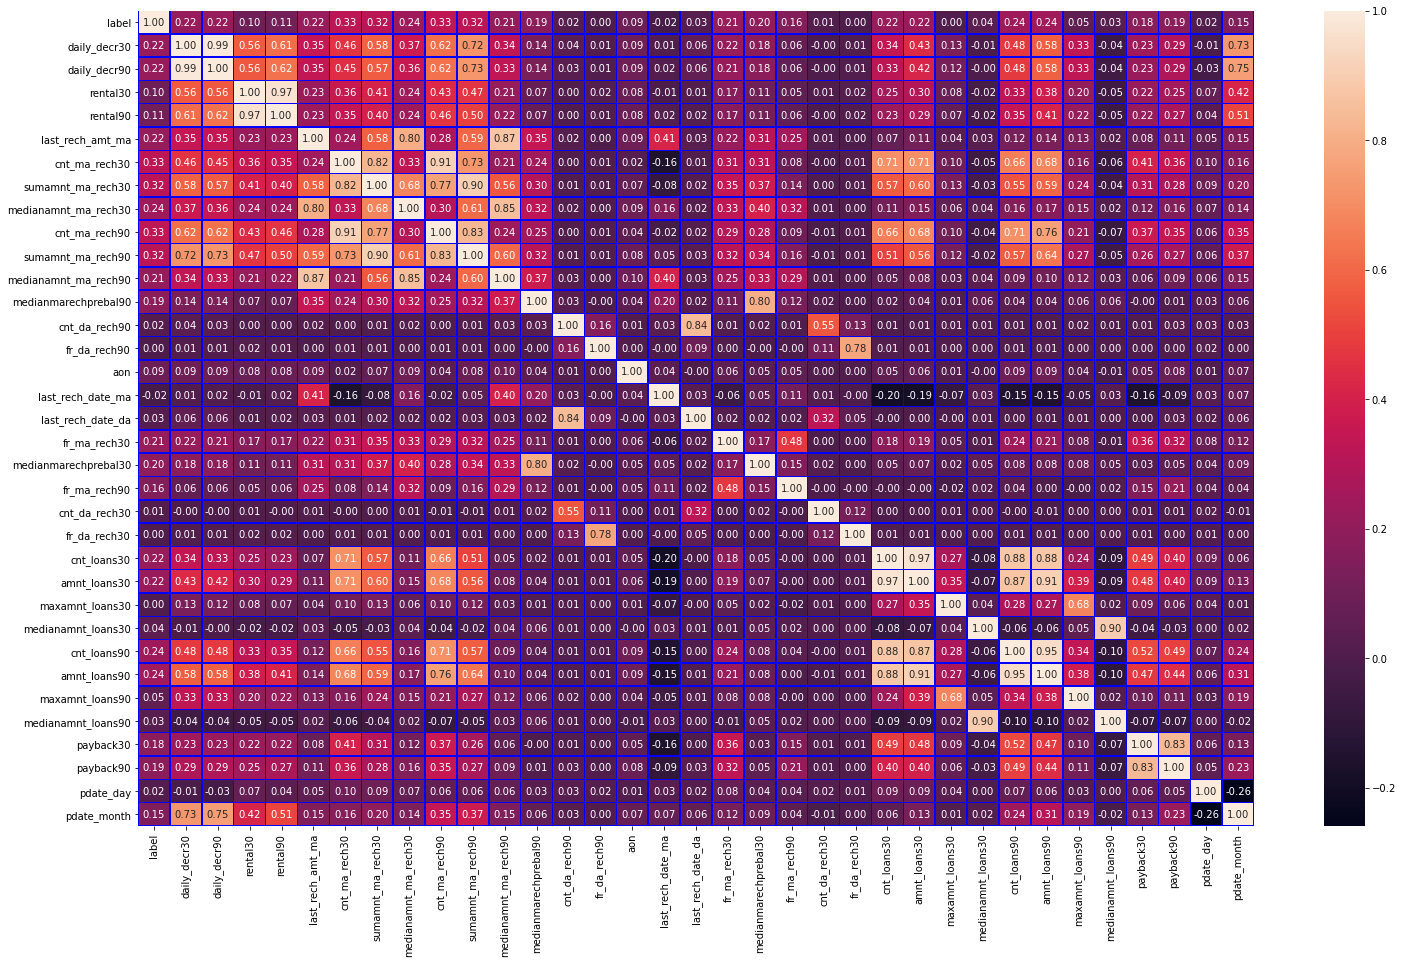

In [56]:
# Visualizing correlation
plt.figure(figsize=(25,15))
sns.heatmap(dff.corr(),annot=True,linewidths=0.5,linecolor='b',fmt='.2f')

Columns 'daily_decr30', 'daily_decr90', 'last_rech_amt_ma', 'cnt_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'cnt_ma_rech30', 'cnt_ma_rech90' has good correlation with target column 'label'. 

'rental30' has strong positive correlation with 'daily_decr30', 'daily_decr90'. 'rental90' has strong positive correlation with 'daily_decr30', 'daily_decr90'. 'last_rech_amt_ma' has good correlation with 'daily_decr30', 'daily_decr90', 'rental30', 'rental90'. 'cnt_ma_rech30' has good correlation with 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_amt_ma'. 'sumamnt_ma_rech30' has strong correlation with 'daily_decr30', 'daily_decr90', 'last_rech_amt_ma', 'cnt_ma_rech30'. 'medianamnt_ma_rech30' has very strong postive correlation with 'last_rech_amt_ma' and 'sumamnt_ma_rech30'. 'cnt_ma_rech90' has good/strong positive correlation with 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_amt_ma', 'cnt_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30'. 'sumamnt_ma_rech90' has good/strong positive correlation with 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_amt_ma', 'cnt_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'cnt_ma_rech90'. 'medianamnt_ma_rech90' has good/strong positive correlation with 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_amt_ma', 'cnt_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'cnt_ma_rech90','sumamnt_ma_rech90'. 'fr_da_rech30' has strong correlation with 'fr_da_rech90'. 'pdate_month' has strong correlation with 'daily_decr30', 'daily_decr90', 'rental30', 'rental90' and good coorlation with few other columns. Many independent columns have strong correlation with each other hence problem of multicollinearity exists here.

### Dividing dataset in x and y

In [57]:
x=dff.drop('label',axis=1)
x

,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,sumamnt_ma_rech90,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month
0,55.272507,55.363797,14.836779,16.128546,39.230090,1.414214,55.479726,39.230090,1.414214,55.479726,...,1.238226,0.0,0.881374,3.464102,2.449490,0.0,5.385165,5.385165,20.0,7.0
1,110.099955,110.112443,60.755740,60.755740,76.072334,1.000000,76.072334,76.072334,1.000000,76.072334,...,1.496068,0.0,0.693147,3.464102,3.464102,0.0,0.000000,0.000000,10.0,8.0
2,37.389838,37.389838,30.002167,30.002167,39.230090,1.000000,39.230090,39.230090,1.000000,39.230090,...,1.238226,0.0,0.693147,2.449490,2.449490,0.0,0.000000,0.000000,19.0,8.0
3,4.607385,4.607385,12.626163,12.626163,30.773365,0.000000,0.000000,0.000000,1.000000,30.773365,...,1.238226,0.0,0.881374,3.464102,2.449490,0.0,0.000000,0.000000,6.0,6.0
4,12.272707,12.272707,33.149661,33.149661,48.052055,2.645751,141.523850,48.052055,2.828427,153.284050,...,1.238226,0.0,1.293562,6.480741,2.449490,0.0,1.527525,1.527525,22.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,12.323649,12.323649,33.002879,33.002879,63.623895,1.732051,102.000000,56.373753,1.732051,102.000000,...,1.238226,0.0,0.881374,3.464102,2.449490,0.0,1.000000,1.000000,17.0,6.0
209589,6.077499,6.077499,41.573549,41.573549,27.802878,2.000000,55.605755,27.802878,2.449490,63.545259,...,1.238226,0.0,1.005053,4.242641,2.449490,0.0,1.000000,1.000000,12.0,6.0
209590,108.826062,109.107058,76.562589,94.303765,39.230090,2.236068,96.612629,39.230090,3.316625,136.352484,...,1.496068,0.0,1.238226,7.348469,3.464102,0.0,2.000000,1.957890,29.0,7.0
209591,111.750742,112.135498,20.293595,31.378018,27.802878,2.236068,110.245181,27.802878,2.449490,133.944018,...,1.496068,0.0,1.005053,4.898979,3.464102,0.0,0.000000,3.240370,25.0,7.0


In [58]:
y=dff['label']
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 182425, dtype: int64

In [59]:
# Checking shapes of x and y 
print('Shape of x : ',x.shape)
print('Shape of y : ',y.shape)

Shape of x :  (182425, 34)
Shape of y :  (182425,)


### Multicollinearity with VIF

In [60]:
# Imporing required libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
def calc_vif(x) :
    vif=pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

calc_vif(x)

,Variables,VIF Factors
0,daily_decr30,174.733248
1,daily_decr90,194.239242
2,rental30,55.837456
3,rental90,60.553323
4,last_rech_amt_ma,22.491042
5,cnt_ma_rech30,127.780960
6,sumamnt_ma_rech30,119.987373
7,medianamnt_ma_rech30,31.476710
8,cnt_ma_rech90,145.789925
9,sumamnt_ma_rech90,127.764554


In [62]:
# Drop high Multicollinear column
x1=x.drop('amnt_loans30',axis=1)
calc_vif(x1)

,Variables,VIF Factors
0,daily_decr30,174.563788
1,daily_decr90,194.199564
2,rental30,55.731381
3,rental90,60.405030
4,last_rech_amt_ma,22.488858
5,cnt_ma_rech30,127.115347
6,sumamnt_ma_rech30,119.961238
7,medianamnt_ma_rech30,31.466074
8,cnt_ma_rech90,144.525081
9,sumamnt_ma_rech90,127.506835


In [63]:
# Drop high Multicollinear column
x1=x1.drop('daily_decr90',axis=1)
calc_vif(x1)

,Variables,VIF Factors
0,daily_decr30,7.719216
1,rental30,51.392640
2,rental90,55.315671
3,last_rech_amt_ma,22.487412
4,cnt_ma_rech30,126.738207
5,sumamnt_ma_rech30,115.478432
6,medianamnt_ma_rech30,31.186804
7,cnt_ma_rech90,144.071249
8,sumamnt_ma_rech90,120.005990
9,medianamnt_ma_rech90,43.729938


In [64]:
# Drop high Multicollinear column
x1=x1.drop('cnt_ma_rech90',axis=1)
calc_vif(x1)

,Variables,VIF Factors
0,daily_decr30,7.705160
1,rental30,51.258686
2,rental90,55.131889
3,last_rech_amt_ma,22.303640
4,cnt_ma_rech30,26.058893
5,sumamnt_ma_rech30,68.070252
6,medianamnt_ma_rech30,29.737544
7,sumamnt_ma_rech90,46.907993
8,medianamnt_ma_rech90,36.590247
9,medianmarechprebal90,8.641857


In dataset, among multicolnear columns the features that are contributing less to the output variable can be dropped. We can drop 2-3 columns showing high colinearity but not all as it impacts the output.

Machine learning needs refined dataset. It needs only those columns that are highly contributing to the output. Clean data for which EDA is used. This is for better learning and prediction of data by models.

Once refining is done we'll do Standard Scaler to make all data scaled to mean=0 and std.dev.=+-1, so that prediction could be nearby.

### Scaling : Standard Scaler / Min-Max Scaler

In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xs=sc.fit_transform(x1)
x2=pd.DataFrame(xs,columns=x1.columns)
x2

,daily_decr30,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month
0,0.067074,-0.857495,-0.846938,0.015935,-0.302445,-0.356320,0.151346,-0.611362,0.103081,-0.778297,...,-0.073769,-0.260381,-0.287783,-0.426942,-0.244500,-0.239047,3.225110,2.825558,0.666272,0.246422
1,1.172223,0.642892,0.411353,1.741402,-0.718859,0.096016,1.942994,-0.256955,1.979211,0.128634,...,1.132692,-0.260381,-0.937068,-0.426942,2.149958,-0.239047,-0.841308,-0.905936,-0.520814,1.598488
2,-0.293384,-0.361971,-0.455762,0.015935,-0.718859,-0.713258,0.151346,-0.891024,0.103081,0.187777,...,-0.073769,-0.260381,-0.937068,-0.910392,-0.244500,-0.239047,-0.841308,-0.905936,0.547564,1.598488
3,-0.954176,-0.929726,-0.945689,-0.380127,-1.724170,-1.574982,-1.756423,-1.036568,-0.327564,-0.985176,...,-0.073769,-0.260381,-0.287783,-0.426942,-0.244500,-0.239047,-0.841308,-0.905936,-0.995649,-1.105644
4,-0.799667,-0.259128,-0.367017,0.429102,0.935635,1.533718,0.580361,1.071888,0.841980,-0.210376,...,-0.073769,-0.260381,1.134056,1.010450,-0.244500,-0.239047,0.312149,0.152518,0.903689,-1.105644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182420,-0.798640,-0.263924,-0.371155,1.158393,0.017081,0.665541,0.985047,0.189270,0.976093,0.444804,...,-0.073769,-0.260381,-0.287783,-0.426942,-0.244500,-0.239047,-0.086193,-0.213015,0.310146,-1.105644
182421,-0.924543,0.016120,-0.129500,-0.519246,0.286453,-0.353551,-0.404362,-0.472551,-0.478831,0.622071,...,-0.073769,-0.260381,0.138845,-0.055978,-0.244500,-0.239047,-0.086193,-0.213015,-0.283397,-1.105644
182422,1.146545,1.159376,1.357260,0.015935,0.523775,0.547202,0.151346,0.780489,0.103081,-0.040749,...,1.132692,-0.260381,0.943175,1.423912,2.149958,-0.239047,0.668922,0.450727,1.734650,0.246422
182423,1.205497,-0.679196,-0.416969,-0.519246,0.523775,0.846654,-0.404362,0.739039,0.605529,0.519558,...,1.132692,-0.260381,0.138845,0.256760,2.149958,-0.239047,-0.841308,1.339385,1.259815,0.246422


Scaling is done for making data points generalized so that the distance between them will be lower.

### Find best random state for Train-Test Split

In [66]:
#Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [67]:
#Finding out the best random state

maxAcc=0
rs=0
for i in range(0,100) :
    x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.3,random_state=i)
    
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    predtrain=dtc.predict(x_train)
    predtest=dtc.predict(x_test)
    acctrain=accuracy_score(y_train,predtrain)
    acctest=accuracy_score(y_test,predtest)
    #if round(acctrain,1)==round(acctest,1) :
    #    print('Best random state : ',i,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',acctest*100)
        
    if acctest>maxAcc :
        maxAcc=acctest
        rs=i      
print('Final Best random state : ',rs,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',maxAcc*100)

Final Best random state :  17  Accuracy(Training) :  99.99686758498633  Accuracy(Testing) :  88.7845344247917


Here, we are getting good accuracy for random state=17. So, lets take 17 as our best random state.

In [68]:
# train-test split with best randon state and finding the train and test set shape after splittng
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.3,random_state=17)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(127697, 31)
(54728, 31)
(127697,)
(54728,)


In [69]:
y_train.value_counts()

1    112432
0     15265
Name: label, dtype: int64

Huge difference is there in both classes of training set hence balancing the class now.

### Class Imbalance

In [70]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
trainx,trainy=sm.fit_resample(x_train,y_train)

Resampling is done on training dataset as samplng on whole dataset will create unnecessary testing and validation sets which will give misleading results.

In [71]:
# Checking size of training set in target column
trainy.value_counts()

0    112432
1    112432
Name: label, dtype: int64

### Finding the best algorithm

In [72]:
# Making instance of classifiers
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
xg=GradientBoostingClassifier()

In [73]:
#Executing all algorithms in a single for loop

algo_list=[lr,dtc,rf,xg]
for i in algo_list :
    print(i)
    i.fit(trainx,trainy)
    predtrain=i.predict(trainx)
    predtest=i.predict(x_test)
    acctrain=accuracy_score(trainy,predtrain)
    acctest=accuracy_score(y_test,predtest)
    err=mean_absolute_error(y_test,predtest)
    
    print('Accuracy(Training) : ',acctrain*100,' Accuracy(Test) ',acctest*100,' Mean absolute error : ',err)
    print(confusion_matrix(y_test,predtest))
    print(classification_report(y_test,predtest))
    print('\n')

LogisticRegression()
Accuracy(Training) :  77.39878326455101  Accuracy(Test)  75.7473322613653  Mean absolute error :  0.24252667738634703
[[ 5057  1391]
 [11882 36398]]
              precision    recall  f1-score   support

           0       0.30      0.78      0.43      6448
           1       0.96      0.75      0.85     48280

    accuracy                           0.76     54728
   macro avg       0.63      0.77      0.64     54728
weighted avg       0.88      0.76      0.80     54728



DecisionTreeClassifier()
Accuracy(Training) :  99.99911057350221  Accuracy(Test)  87.39584856015202  Mean absolute error :  0.12604151439847974
[[ 3867  2581]
 [ 4317 43963]]
              precision    recall  f1-score   support

           0       0.47      0.60      0.53      6448
           1       0.94      0.91      0.93     48280

    accuracy                           0.87     54728
   macro avg       0.71      0.76      0.73     54728
weighted avg       0.89      0.87      0.88     54728


RandomForestClassifier() has the highest accuracy but let's go for cross validation for all the models used.

In [74]:
# Computing cross validation score of all the models used
from sklearn.model_selection import cross_val_score

for i in algo_list :
    print('CV mean of ',i,' is ',cross_val_score(i,x2,y,cv=5).mean())

CV mean of  LogisticRegression()  is  0.8832780594764973
CV mean of  DecisionTreeClassifier()  is  0.8855255584486775
CV mean of  RandomForestClassifier()  is  0.9214910237083733
CV mean of  GradientBoostingClassifier()  is  0.9203563108126627


Looking at difference of accuracy and cv mean, opting for RandomForestClassifier as our best model with accuracy of 92% and having least difference between accuracy and cv mean.

### Hyperparameter Tuning

In [ ]:
# Using hyper parameter tuning on selected model for better accuracy and to avoid overfitting issues
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['gini', 'entropy'],
              'max_features':['auto', 'sqrt', 'log2'],
              'class_weight':['balanced','balanced_subsample',None],
              'min_samples_leaf':[1,2,3]}
              #'verbose':[0,1,2,3,4,5],
              #'n_estimators':[10,50,100]}

rf=RandomForestClassifier()
GCV=GridSearchCV(rf,parameters,cv=5)
GCV.fit(trainx,trainy)
GCV.best_params_

Using hyper parameter tuning for better accuracy and to avoid overfitting issues with best parameters on selected model.

In [76]:
rf=RandomForestClassifier(class_weight=None,criterion='entropy',max_features='log2',min_samples_leaf=3)
rf.fit(trainx,trainy)
pred=rf.predict(x_test)
acc=accuracy_score(y_test,pred)
cv=cross_val_score(rf,x2,y,cv=5).mean()

print('Accuracy : ',acc,' CV mean : ',cv)

Accuracy :  0.9128416898114311  CV mean :  0.9221269014663559


#### We are getting model accuracy as 91% and cv mean as 0.92, this shows our model is performing good.

### AUC-ROC Curve

In [79]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rf=RandomForestClassifier(class_weight=None,criterion='entropy',max_features='log2',min_samples_leaf=3)
rf.fit(trainx,trainy)
pred=rf.predict(x_test)
acc1=accuracy_score(y_test,pred)

Applying AUC-ROC curve on selected model i.e. RandomForestClassifier()

In [80]:
pred_proba=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_proba)
#print(fpr,tpr,thresholds)

Calculating fpr,tpr,thresholds for selected model

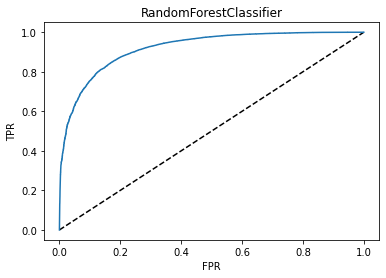

In [81]:
# Plotting the curve

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RandomForestClassifier')
plt.show()

In [82]:
auc_score=roc_auc_score(y_test,pred_proba)
print('Accuracy : ',acc1)
print('ROC_AUC score : ',auc_score)

Accuracy :  0.9127503288992838
ROC_AUC score :  0.919904438169302


Getting good accuracy score and AUC-ROC score for the model selected

### Saving the model

In [83]:
# Saved the model in .pkl file
import pickle #import joblib
file='credit_defaulter.pkl'
pickle.dump(rf,open(file,'wb'))

### Conclusion

In [84]:
# Loading the model for checking score on actual and predicted test sets
load_model=pickle.load(open(file,'rb'))
result=load_model.score(x_test,y_test)
result

0.9127503288992838

In [85]:
#Printing the shapes of test sets to make comparison dataframe
print(x_test.shape)
print(y_test.shape)

(54728, 31)
(54728,)


In [88]:
# Comparison dataframe having Original and Predicted values
actual=np.array(y_test)
predicted=np.array(rf.predict(x_test))
conclusion=pd.DataFrame({'Orignal':actual,'Predicted':predicted})
conclusion[:20]

,Orignal,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,0,0
7,1,1
8,1,1
9,0,0
